In [3]:
from __future__ import annotations
from typing import Any 

import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from premise_selection.evaluate import EvalResult, EvalData

/home/ubuntu/coq-modeling/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:

PATHS = {
    "MSE Loss": "/home/ubuntu/coq-modeling/models/premise_selection_no_coq_notation_tac/epoch=2-step=44628-eval.json",
    "Supervised Contrastive Loss; Temp = 1": "/home/ubuntu/coq-modeling/models/premise_selection_supcon/epoch=0-step=14876-eval.json",
    "Supervised Contrastive Loss; Temp = 0.1": "/home/ubuntu/coq-modeling/models/premise_selection_low_temp/epoch=0-step=14876-eval.json",
    "Multivalent Contrastive Loss": "/home/ubuntu/coq-modeling/models/premise_selection_multivalent/epoch=0-step=14876-eval.json",
}

ATS = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
names: list[str] = []
recalls_list: list[list[float]] = []
for name, path in PATHS.items():
    with open(path, "r") as fin:
        eval_json_data = json.load(fin)
    eval_data = EvalData.from_json(eval_json_data)
    recalls: list[float] = []
    for k in ATS:
        recall_at_k = eval_data.recall_at(k)
        recalls.append(recall_at_k) 
    names.append(name)
    recalls_list.append(recalls)
    

Text(0.5, 1.0, 'Comparison of Loss Functions for Premise Selection')

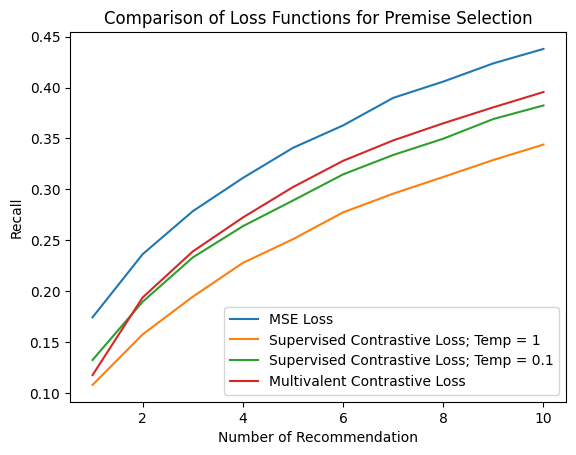

In [10]:
fig, ax = plt.subplots()
for name, recalls in zip(names, recalls_list):
    ax.plot(ATS, recalls, label=name)
ax.set_xlabel("Number of Recommendation")
ax.set_ylabel("Recall")
ax.legend()
ax.set_title("Comparison of Loss Functions for Premise Selection")



In [8]:
precisions: list[float] = []
recalls: list[float] = []
for k in ATS:
    precisions.append(eval_data.precision_at(k))
    recalls.append(eval_data.recall_at(k))

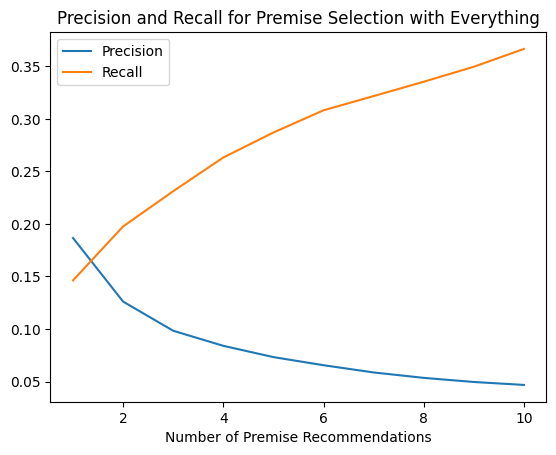

In [10]:
fig, ax = plt.subplots()
ax.plot(ATS, precisions, label="Precision")
ax.plot(ATS, recalls, label="Recall")
ax.set_xlabel("Number of Premise Recommendations")
ax.set_title("Precision and Recall for Premise Selection with Everything")
ax.legend()